# Week 6 - Lecture 12

**KF Python Course**

*April 01, 2025*
___

## Git Repository Update

Clone the repository, the repository is update every week

## 0. Importing pandas

To get started using pandas, the first step is to import it. 

The most common way (and method you should use) is to import pandas as the abbreviation `pd` (e.g. `pandas` -> `pd`).

If you see the letters `pd` used anywhere in machine learning or data science, it's probably referring to the pandas library.

In [3]:
import pandas as pd

# Print the version
print(f"pandas version: {pd.__version__}")

pandas version: 2.1.2


## 1. Datatypes

pandas has two main datatypes, `Series` and `DataFrame`.
* [`pandas.Series`](https://pandas.pydata.org/docs/reference/api/pandas.Series.html) - a 1-dimensional column of data.
* [`pandas.DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) (most common) - a 2-dimesional table of data with rows and columns.

You can create a `Series` using `pd.Series()` and passing it a Python list.

In [8]:
# Creating a series of car types
cars = pd.Series(["BMW", "Toyota", "Honda"])
cars

0       BMW
1    Toyota
2     Honda
dtype: object

In [9]:
# Creating a series of colours
colours = pd.Series(["Blue", "Red", "White"])
colours

0     Blue
1      Red
2    White
dtype: object

You can create a `DataFrame` by using `pd.DataFrame()` and passing it a Python dictionary.

Let's use our two `Series` as the values.

In [10]:
# Creating a DataFrame of cars and colours
car_data = pd.DataFrame({"Car type": cars, 
                         "Colour": colours})
car_data

,Car type,Colour
0,BMW,Blue
1,Toyota,Red
2,Honda,White


You can see the keys of the dictionary became the column headings (text in bold) and the values of the two `Series`'s became the values in the DataFrame.

It's important to note, many different types of data could go into the DataFrame. 

Here we've used only text but you could use floats, integers, dates and more.

### Exercises

1. Make a `Series` of different foods.
2. Make a `Series` of different dollar values (these can be integers).
3. Combine your `Series`'s of foods and dollar values into a `DataFrame`.

Try it out for yourself first, then see how your code goes against the solution.

**Note:** Make sure your two `Series` are the same size before combining them in a DataFrame.

In [ ]:
# Your code here

In [ ]:
# Example solution

# Make a Series of different foods
foods = pd.Series(["Almond butter", "Eggs", "Avocado"])

# Make a Series of different dollar values 
prices = pd.Series([9, 6, 2])

# Combine your Series of foods and dollar values into a DataFrame
food_data = pd.DataFrame({"Foods": foods,
                          "Price": prices})

food_data

,Foods,Price
0,Almond butter,9
1,Eggs,6
2,Avocado,2


## 2. Importing data

Creating `Series` and `DataFrame`'s from scratch is nice but what you'll usually be doing is importing your data in the form of a `.csv` (comma separated value), spreadsheet file or something similar such as an [SQL database](https://pandas.pydata.org/docs/reference/api/pandas.read_sql.html).

pandas allows for easy importing of data like this through functions such as [`pd.read_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html) and [`pd.read_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html) (for Microsoft Excel files).

Say you wanted to get this information from this Google Sheet document into a pandas `DataFrame`. 

<img src="https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/81492352d12d7a52caef57bba7744cbdc34af33f/images/pandas-car-sales-csv.png" alt="spreadsheet with car sales information" width="600">

You could export it as a `.csv` file and then import it using `pd.read_csv()`. 

> **Tip:** If the Google Sheet is public, `pd.read_csv()` can read it via URL, try searching for "pandas read Google Sheet with URL".

In this case, the exported `.csv` file is called `car-sales.csv`.

In [4]:
# Import car sales data
car_sales = pd.read_csv("data_pandas/car-sales.csv") # takes a filename as string as input

# Option 2: Read directly from a URL/Google Sheets
# If you are reading from GitHub, be sure to use the "raw" link (original link: https://github.com/mrdbourke/zero-to-mastery-ml/blob/master/data/car-sales.csv)
car_sales = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


Now we've got the same data from the spreadsheet available in a pandas `DataFrame` called `car_sales`. 

Having your data available in a `DataFrame` allows you to take advantage of all of pandas functionality on it.

Another common practice you'll see is data being imported to `DataFrame` called `df` (short for `DataFrame`).

In [12]:
# Import the car sales data and save it to df

# Option 1: Read from a CSV file (stored on our local computer)
df = pd.read_csv("data_pandas/car-sales.csv")

# Option 2: Read directly from a URL/Google Sheets (if the file is hosted online)
df = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales.csv")
df

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


Now `car_sales` and `df` contain the exact same information, the only difference is the name. Like any other variable, you can name your `DataFrame`'s whatever you want. But best to choose something simple.

### Anatomy of a DataFrame

Different functions use different labels for different things. This graphic sums up some of the main components of `DataFrame`'s and their different names.

<img src="https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/81492352d12d7a52caef57bba7744cbdc34af33f/images/pandas-dataframe-anatomy.png" alt="pandas dataframe with different sections labelled" width="800"/>


## 3. Exporting data

After you've made a few changes to your data, you might want to export it and save it so someone else can access the changes.

pandas allows you to export `DataFrame`'s to `.csv` format using [`.to_csv()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html) or spreadsheet format using [`.to_excel()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_excel.html).

We haven't made any changes yet to the `car_sales` `DataFrame` but let's try export it.

In [16]:
# Export the car sales DataFrame to csv
car_sales.to_csv("data_pandas/exported-car-sales.csv")

Running this will save a file called `export-car-sales.csv` to the current folder.

<img src="https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/81492352d12d7a52caef57bba7744cbdc34af33f/images/pandas-exported-car-sales-csv.png" alt="folder with exported car sales csv file highlighted" width="600"/>

## Exercises

1. Practice importing a `.csv` file using `pd.read_csv()`, you can download `heart-disease.csv`. This file contains annonymous patient medical records and whether or not they have heart disease.
2. Practice exporting a `DataFrame` using `.to_csv()`. You could export the heart disease `DataFrame` after you've imported it.

**Note:** 
* Make sure the `heart-disease.csv` file is in the same folder as your notebook orbe sure to use the filepath where the file is.
* You can name the variables and exported files whatever you like but make sure they're readable.

In [ ]:
# Your code here


### Example solution

In [14]:
# Importing heart-disease.csv
patient_data = pd.read_csv("data_pandas/heart-disease.csv")
patient_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [15]:
# Exporting the patient_data DataFrame to csv
patient_data.to_csv("data_pandas/exported-patient-data.csv")

<img src="https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/81492352d12d7a52caef57bba7744cbdc34af33f/images/pandas-exported-patient-data-csv.png" alt="folder containing exported patient data csv file" width="600"/>

## 4. Describing data

One of the first things you'll want to do after you import some data into a pandas `DataFrame` is to start exploring it.

pandas has many built in functions which allow you to quickly get information about a `DataFrame`.

Let's explore some using the `car_sales` `DataFrame`.

In [17]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


[`.dtypes`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html) shows us what datatype each column contains.

In [18]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price            object
dtype: object

Notice how the `Price` column isn't an integer like `Odometer` or `Doors`. Don't worry, pandas makes this easy to fix.

[`.describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html) gives you a quick statistical overview of the numerical columns.

In [19]:
car_sales.describe()

,Odometer (KM),Doors
count,10.000000,10.000000
mean,78601.400000,4.000000
std,61983.471735,0.471405
min,11179.000000,3.000000
25%,35836.250000,4.000000
50%,57369.000000,4.000000
75%,96384.500000,4.000000
max,213095.000000,5.000000


[`.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html) shows a handful of useful information about a `DataFrame` such as: 
* How many entries (rows) there are 
* Whether there are missing values (if a columns non-null value is less than the number of entries, it has missing values)
* The datatypes of each column

In [20]:
car_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Make           10 non-null     object
 1   Colour         10 non-null     object
 2   Odometer (KM)  10 non-null     int64 
 3   Doors          10 non-null     int64 
 4   Price          10 non-null     object
dtypes: int64(2), object(3)
memory usage: 532.0+ bytes


You can also call various statistical and mathematical methods such as [`.mean()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.mean.html) or [`.sum()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sum.html) directly on a `DataFrame` or `Series`.

In [21]:
# Calling .mean() on a DataFrame
car_sales.mean(numeric_only=True) # numeric_only = get mean values of numeric columnns only

Odometer (KM)    78601.4
Doors                4.0
dtype: float64

In [22]:
# Calling .mean() on a Series
car_prices = pd.Series([3000, 3500, 11250])
car_prices.mean()

5916.666666666667

In [24]:
# Calling .sum() on a DataFrame with numeric_only=False (default)
car_sales.sum(numeric_only=False)

Make             ToyotaHondaToyotaBMWNissanToyotaHondaHondaToyo...
Colour               WhiteRedBlueBlackWhiteGreenBlueBlueWhiteWhite
Odometer (KM)                                               786014
Doors                                                           40
Price            $4,000.00$5,000.00$7,000.00$22,000.00$3,500.00...
dtype: object

In [25]:
# Calling .sum() on a DataFrame with numeric_only=True
car_sales.sum(numeric_only=True)

Odometer (KM)    786014
Doors                40
dtype: int64

In [26]:
# Calling .sum() on a Series
car_prices.sum()

17750

Calling these on a whole `DataFrame` may not be as helpful as targeting an individual column. But it's helpful to know they're there.

`.columns` will show you all the columns of a `DataFrame`.

In [27]:
car_sales.columns

Index(['Make', 'Colour', 'Odometer (KM)', 'Doors', 'Price'], dtype='object')

You can save them to a list which you could use later.

In [28]:
# Save car_sales columns to a list 
car_columns = car_sales.columns
car_columns[0]

'Make'

`.index` will show you the values in a `DataFrame`'s index (the column on the far left).

In [29]:
car_sales.index

RangeIndex(start=0, stop=10, step=1)

pandas `DataFrame`'s, like Python lists, are 0-indexed (unless otherwise changed). This means they start at 0. 

<img src="https://dev.mrdbourke.com/zero-to-mastery-ml/images/pandas-dataframe-zero-indexed.png" alt="dataframe with index number 0 highlighted" width="700"/>

In [30]:
# Show the length of a DataFrame
len(car_sales)

10

So even though the length of our `car_sales` dataframe is 10, this means the indexes go from 0-9.

## 5. Viewing and selecting data

Some common methods for viewing and selecting data in a pandas DataFrame include:

* [`DataFrame.head(n=5)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html) - Displays the first `n` rows of a DataFrame (e.g. `car_sales.head()` will show the first 5 rows of the `car_sales` DataFrame).
* [`DataFrame.tail(n=5)`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.tail.html) - Displays the last `n` rows of a DataFrame.
* [`DataFrame.loc[]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) - Accesses a group of rows and columns by labels or a boolean array.
* [`DataFrame.iloc[]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html) - Accesses a group of rows and columns by integer indices (e.g. `car_sales.iloc[0]` shows all the columns from index `0`.
* [`DataFrame.columns`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.columns.html) -  Lists the column labels of the DataFrame.
* `DataFrame['A']` - Selects the column named `'A'` from the DataFrame.
* `DataFrame[DataFrame['A'] > 5]` - Boolean indexing filters rows based on column values meeting a condition (e.g. all rows from column `'A'` greater than `5`.
* [`DataFrame.plot()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html) - Creates a line plot of a DataFrame's columns (e.g. plot `Make` vs. `Odometer (KM)` columns with `car_sales[["Make", "Odometer (KM)"]].plot();`).
* [`DataFrame.hist()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.hist.html) - Generates histograms for columns in a DataFrame.
* [`pandas.crosstab()`](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) - Computes a cross-tabulation of two or more factors.

In practice, you'll constantly be making changes to your data, and viewing it. Changing it, viewing it, changing it, viewing it.

You won't always want to change all of the data in your `DataFrame`'s either. So there are just as many different ways to select data as there is to view it.

`.head()` allows you to view the first 5 rows of your `DataFrame`. You'll likely be using this one a lot. 

In [31]:
# Show the first 5 rows of car_sales
car_sales.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"


Why 5 rows? Good question. I don't know the answer. But 5 seems like a good amount.

Want more than 5?

No worries, you can pass `.head()` an integer to display more than or less than 5 rows.

In [32]:
# Show the first 7 rows of car_sales
car_sales.head(7)

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"


`.tail()` allows you to see the bottom 5 rows of your `DataFrame`. This is helpful if your changes are influencing the bottom rows of your data.

In [33]:
# Show bottom 5 rows of car_sales
car_sales.tail()

,Make,Colour,Odometer (KM),Doors,Price
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


You can use `.loc[]` and `.iloc[]` to select data from your `Series` and `DataFrame`'s.

Let's see.

In [34]:
# Create a sample series
animals = pd.Series(["cat", "dog", "bird", "snake", "ox", "lion"], 
                    index=[0, 3, 9, 8, 67, 3])
animals

0       cat
3       dog
9      bird
8     snake
67       ox
3      lion
dtype: object

[`.loc[]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.loc.html) takes an integer or label as input. And it chooses from your `Series` or `DataFrame` whichever index matches the number.

In [35]:
# Select all indexes with 3
animals.loc[3]

3     dog
3    lion
dtype: object

In [36]:
# Select index 9
animals.loc[9]

'bird'

Let's try with our `car_sales` DataFrame.

In [37]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [38]:
# Select row at index 3
car_sales.loc[3]

Make                    BMW
Colour                Black
Odometer (KM)         11179
Doors                     5
Price            $22,000.00
Name: 3, dtype: object

[`iloc[]`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.iloc.html) does a similar thing but works with exact positions.


In [39]:
animals

0       cat
3       dog
9      bird
8     snake
67       ox
3      lion
dtype: object

In [40]:
# Select row at position 3
animals.iloc[3]

'snake'

Even though `'snake'` appears at index 8 in the series, it's shown using `.iloc[3]` because it's at the 3rd (starting from 0) position.

Let's try with the `car_sales` `DataFrame`.

In [41]:
# Select row at position 3
car_sales.iloc[3]

Make                    BMW
Colour                Black
Odometer (KM)         11179
Doors                     5
Price            $22,000.00
Name: 3, dtype: object

You can see it's the same as `.loc[]` because the index is in order, position 3 is the same as index 3.

You can also use slicing with `.loc[]` and `.iloc[]`.

In [42]:
# Get all rows up to position 3
animals.iloc[:3]

0     cat
3     dog
9    bird
dtype: object

In [43]:
# Get all rows up to (and including) index 3
car_sales.loc[:3]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"


In [44]:
# Get all rows of the "Colour" column
car_sales.loc[:, "Colour"] # note: ":" stands for "all", e.g. "all indices in the first axis"

0    White
1      Red
2     Blue
3    Black
4    White
5    Green
6     Blue
7     Blue
8    White
9    White
Name: Colour, dtype: object

When should you use `.loc[]` or `.iloc[]`?
* Use `.loc[]` when you're selecting rows and columns **based on their lables or a condition** (e.g. retrieving data for specific columns).
* Use `.iloc[]` when you're selecting rows and columns **based on their integer index positions** (e.g. extracting the first ten rows regardless of the labels).

However, in saying this, it will often take a bit of practice with each of the methods before you figure out which you'd like to use.

If you want to select a particular column, you can use `DataFrame.['COLUMN_NAME']`.

In [45]:
# Select Make column
car_sales['Make']

0    Toyota
1     Honda
2    Toyota
3       BMW
4    Nissan
5    Toyota
6     Honda
7     Honda
8    Toyota
9    Nissan
Name: Make, dtype: object

In [46]:
# Select Colour column
car_sales['Colour']

0    White
1      Red
2     Blue
3    Black
4    White
5    Green
6     Blue
7     Blue
8    White
9    White
Name: Colour, dtype: object

Boolean indexing works with column selection too. Using it will select the rows which fulfill the condition in the brackets.

In [47]:
# Select cars with over 100,000 on the Odometer
car_sales[car_sales["Odometer (KM)"] > 100000]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
4,Nissan,White,213095,4,"$3,500.00"


In [48]:
# Select cars which are made by Toyota
car_sales[car_sales["Make"] == "Toyota"]

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
5,Toyota,Green,99213,4,"$4,500.00"
8,Toyota,White,60000,4,"$6,250.00"


`pd.crosstab()` is a great way to view two different columns together and compare them.

In [49]:
# Compare car Make with number of Doors
pd.crosstab(car_sales["Make"], car_sales["Doors"])

Doors,3,4,5
Make,,,
BMW,0,0,1
Honda,0,3,0
Nissan,0,2,0
Toyota,1,3,0


If you want to compare more columns in the context of another column, you can use `.groupby()`.

In [50]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [51]:
# Group by the Make column and find the mean of the other columns 
car_sales.groupby(["Make"]).mean(numeric_only=True)

,Odometer (KM),Doors
Make,,
BMW,11179.000000,5.00
Honda,62778.333333,4.00
Nissan,122347.500000,4.00
Toyota,85451.250000,3.75


pandas even allows for quick plotting of columns so you can see your data visualling. To plot, you'll have to import `matplotlib`. If your plots aren't showing, try running the two lines of code below.

`%matplotlib inline` is a special command which tells Jupyter to show your plots. Commands with `%` at the front are called magic commands.

In [5]:
# Import matplotlib and tell Jupyter to show plots
import matplotlib.pyplot as plt
%matplotlib inline

You can visualize a column by calling `.plot()` on it.

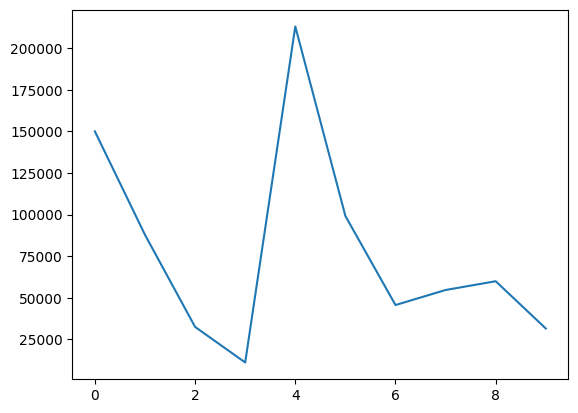

In [6]:
car_sales["Odometer (KM)"].plot(); # tip: the ";" on the end prevents matplotlib from outputing the plot class

Or compare two columns by passing them as `x` and `y` to `plot()`.

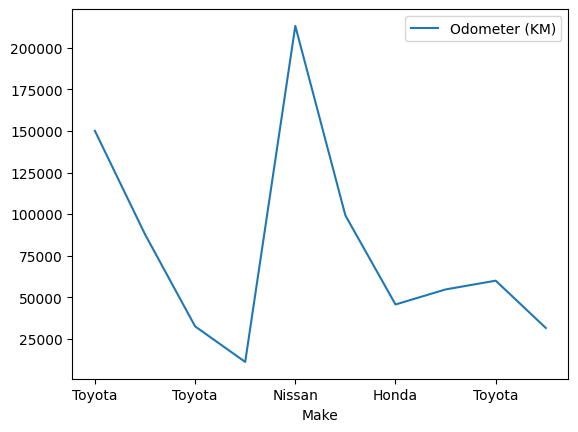

In [7]:
car_sales.plot(x="Make", y="Odometer (KM)"); 

You can see the distribution of a column by calling `.hist()` on you.

The distribution of something is a way of describing the spread of different values.

<Axes: >

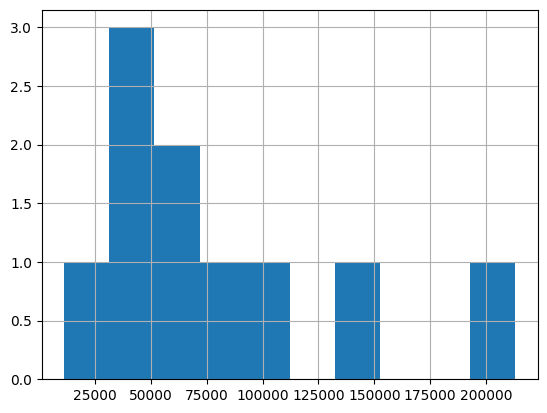

In [8]:
car_sales["Odometer (KM)"].hist()

## 6. Manipulating data

You've seen an example of one way to manipulate data but pandas has many more. 

How many more? 

Put it this way, if you can imagine it, chances are, pandas can do it.

Let's start with string methods. Because pandas is based on Python, however you can manipulate strings in Python, you can do the same in pandas.

You can access the string value of a column using `.str`. Knowing this, how do you think you'd set a column to lowercase?

In [9]:
# Option 1: Import car sales data with missing values from local file (stored on our computer)
car_sales_missing = pd.read_csv("data_pandas/car-sales-missing-data.csv")

# Option 2: Import car sales data with missing values from GitHub (if the file is hosted online)
car_sales_missing = pd.read_csv("https://raw.githubusercontent.com/mrdbourke/zero-to-mastery-ml/master/data/car-sales-missing-data.csv")
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


Missing values are shown by `NaN` in pandas. This can be considered the equivalent of `None` in Python.

Let's use the [`.fillna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) function to fill the `Odometer` column with the average of the other values in the same column.

In [10]:
# Fill Odometer column missing values with mean
car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean(), 
                                     inplace=False) # inplace is set to False by default 

0    150043.000000
1     87899.000000
2     92302.666667
3     11179.000000
4    213095.000000
5     92302.666667
6     92302.666667
7     92302.666667
8     60000.000000
9     31600.000000
Name: Odometer, dtype: float64

Now let's check the original `car_sales_missing` `DataFrame`.

In [11]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.0,4.0,"$4,000"
1,Honda,Red,87899.0,4.0,"$5,000"
2,Toyota,Blue,NaN,3.0,"$7,000"
3,BMW,Black,11179.0,5.0,"$22,000"
4,Nissan,White,213095.0,4.0,"$3,500"
5,Toyota,Green,NaN,4.0,"$4,500"
6,Honda,NaN,NaN,4.0,"$7,500"
7,Honda,Blue,NaN,4.0,NaN
8,Toyota,White,60000.0,NaN,NaN
9,NaN,White,31600.0,4.0,"$9,700"


Because `inplace` is set to `False` (default), there's still missing values in the `"Odometer"` column. 

Instead of using `inplace`, let's resassign the column to the filled version.

We'll use the syntax `df[col] = df[col].fillna(value)` to fill the missing values in the `"Odometer"` column with the average of the other values in the same column.

In [12]:
# Fill the Odometer missing values to the mean with inplace=True
car_sales_missing["Odometer"] = car_sales_missing["Odometer"].fillna(car_sales_missing["Odometer"].mean())

Now let's check the `car_sales_missing` `DataFrame` again.

In [13]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,NaN,92302.666667,4.0,"$7,500"
7,Honda,Blue,92302.666667,4.0,NaN
8,Toyota,White,60000.000000,NaN,NaN
9,NaN,White,31600.000000,4.0,"$9,700"


The missing values in the `Odometer` column have been filled with the mean value of the same column.

In practice, you might not want to fill a column's missing values with the mean, but this example was to show the difference between `inplace=False` (default) and `inplace=True`.

Whichever you choose to use will depend on how you structure your code. 

All you have to remember is `inplace=False` returns a copy of the `DataFrame` you're working with.

This is helpful if you want to make a duplicate of your current `DataFrame` and save it to another variable.

Where as, `inplace=True` makes all the changes directly to the target `DataFrame`. 

We've filled some values but there's still missing values in `car_sales_missing`. Let's say you wanted to remove any rows which had missing data and only work with rows which had complete coverage.

You can do this using [`.dropna()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html).

In [14]:
# Remove missing data
car_sales_missing.dropna()

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"


It appears the rows with missing values have been removed, now let's check to make sure.

In [15]:
car_sales_missing

,Make,Colour,Odometer,Doors,Price
0,Toyota,White,150043.000000,4.0,"$4,000"
1,Honda,Red,87899.000000,4.0,"$5,000"
2,Toyota,Blue,92302.666667,3.0,"$7,000"
3,BMW,Black,11179.000000,5.0,"$22,000"
4,Nissan,White,213095.000000,4.0,"$3,500"
5,Toyota,Green,92302.666667,4.0,"$4,500"
6,Honda,NaN,92302.666667,4.0,"$7,500"
7,Honda,Blue,92302.666667,4.0,NaN
8,Toyota,White,60000.000000,NaN,NaN
9,NaN,White,31600.000000,4.0,"$9,700"


## Example

Hierarchical clustering of cancer gene expression data 

NCI-60 RNAseq dataset filname: ‘nci_var_filtered.txt’ 

This file is normalized RNA abundance data (TPM). It has been filtered to keep only the genes with variability below a certain threshold. You can open it in your desired spreadsheet program to see what it looks like. 

Read about the NCI-60: https://dtp.cancer.gov/discovery_development/nci-60/ 

Let’s cluster the data to see how similar these cancers are on the basis of gene expression. Is their similarity related to tissue of origin? 

1. **Load the data**. I like using pandas for this.

In [16]:
import pandas as pd 
datafile = 'data_pandas/nci_var_filtered.txt' 
df = pd.read_csv(datafile, sep='\t')

In [17]:
df

,gene,786-0,A498,A549,ACHN,BT-549,CAKI-1,CCRF-CEM,COLO205,DU-145,...,SNB-19,SNB-75,SR,SW-620,T-47D,TK-10,U251,UACC-257,UACC-62,UO-31
0,A1BG,-1.025477,-0.925477,0.274523,-0.875477,2.484523,1.244523,1.914523,-1.025477,0.584523,...,0.494523,-0.705477,0.914523,-0.885477,1.524523,-0.995477,0.314523,1.774523,2.104523,-0.665477
1,A2M,-1.409323,-1.409323,-1.409323,-1.409323,-1.409323,-1.399323,-1.299323,-1.409323,-1.399323,...,-0.889323,-0.729323,-1.409323,-1.229323,-1.399323,-1.399323,-1.369323,5.630677,3.280677,-1.399323
2,A2ML1,-1.696062,-1.686062,-1.686062,-1.686062,-1.696062,-1.696062,-1.696062,-1.696062,-1.696062,...,-1.696062,-1.696062,-1.696062,-1.696062,-1.636062,-1.696062,-1.696062,-1.686062,-1.586062,-1.696062
3,A4GALT,1.978677,1.588677,0.908677,0.348677,1.098677,1.488677,-1.791323,-1.041323,-0.601323,...,0.008677,2.308677,-2.241323,-1.101323,0.668677,-0.181323,-0.131323,-2.241323,-1.581323,1.368677
4,AAAS,0.878385,0.178385,1.658385,-0.291615,-0.011615,0.568385,1.518385,0.148385,0.158385,...,-0.041615,0.638385,0.608385,1.968385,1.218385,0.098385,0.238385,0.778385,0.558385,0.508385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,ZXDA,-0.359754,0.770246,0.040246,-0.259754,-0.199754,0.130246,-0.199754,-0.699754,-0.869754,...,0.050246,0.690246,0.040246,0.810246,0.350246,-0.619754,-0.129754,-0.379754,-0.159754,-0.399754
9990,ZXDB,-0.193538,0.386462,0.616462,-0.533538,-0.083538,-0.233538,0.666462,-0.323538,-0.313538,...,0.196462,0.856462,0.256462,1.666462,0.466462,-0.413538,0.576462,0.106462,-0.253538,-0.413538
9991,ZXDC,-0.565677,-0.705677,-0.775677,-1.125677,-0.785677,-0.545677,0.454323,0.224323,-0.945677,...,-0.215677,0.064323,0.034323,0.524323,-0.085677,-0.995677,-0.625677,-0.125677,-0.035677,-0.615677
9992,ZYG11B,-0.243108,-0.233108,-0.243108,-1.633108,-0.773108,-0.583108,-0.493108,-1.613108,-1.183108,...,-0.473108,0.766892,-0.263108,0.236892,-0.193108,-0.283108,-0.373108,0.116892,0.126892,-0.723108


If doing these steps interactively (in a Python Console), you can check out what the dataframe (df) looks like by entering df 

Get a list of the columns in the df with:

In [33]:
list(df.columns.values)

['786-0',
 'A498',
 'A549',
 'ACHN',
 'BT-549',
 'CAKI-1',
 'CCRF-CEM',
 'COLO205',
 'DU-145',
 'EKVX',
 'HCC-2998',
 'HCT-116',
 'HCT-15',
 'HL-60',
 'HOP-62',
 'HOP-92',
 'HS-578T',
 'HT29',
 'IGR-OV1',
 'K-562',
 'KM12',
 'LOX-IMVI',
 'M14',
 'MALME-3M',
 'MCF7',
 'MDA-MB-231',
 'MDA-MB-435',
 'MDA-MB-468',
 'MOLT-4',
 'NCI-ADR-RES',
 'NCI-H226',
 'NCI-H23',
 'NCI-H322M',
 'NCI-H460',
 'NCI-H522',
 'OVCAR-3',
 'OVCAR-4',
 'OVCAR-5',
 'OVCAR-8',
 'PC-3',
 'RPMI-8226',
 'RXF-393',
 'SF-268',
 'SF-295',
 'SF-539',
 'SK-MEL-2',
 'SK-MEL-28',
 'SK-MEL-5',
 'SK-OV-3',
 'SN12C',
 'SNB-19',
 'SNB-75',
 'SR',
 'SW-620',
 'T-47D',
 'TK-10',
 'U251',
 'UACC-257',
 'UACC-62',
 'UO-31']

Find the size of the df with:

In [19]:
df.shape

(9994, 61)

How many genes and cell lines does the NCI-60 data have?

2. **Process the data for clustering**. Change the index from the numerical index (default when you load a pandas df) to the first column (gene names). 

In [20]:
df = df.set_index('gene')

Get a list of all the cell lines.

In [21]:
cells = list(df.columns.values) 

3. **Create a function** that contains everything needed for performing hierarchical clustering. I’m calling mine dendrogrammer. Once it is written, call the function like so:

In [25]:
import numpy as np 
from scipy.cluster.hierarchy import dendrogram, linkage 
from matplotlib import pyplot as plt

In [30]:
D = df.values
D = np.transpose(D)
Z = linkage(D, method='ward', metric='euclidean')

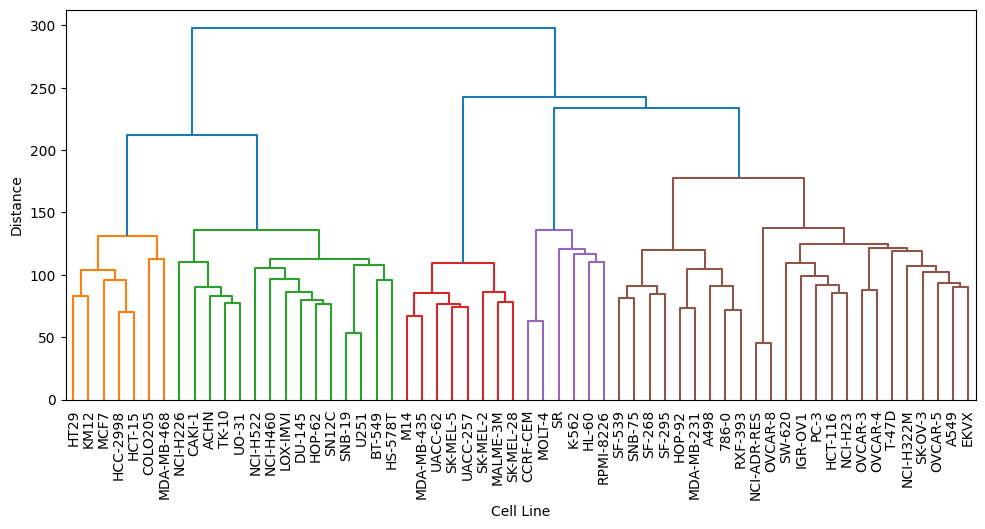

In [34]:
plt.figure(figsize=(10, 6)) 
ax = plt.subplot() 
plt.subplots_adjust(left=0.07, bottom=0.3, right=0.98, top=0.95, wspace=0, hspace=0) 
plt.xlabel('Cell Line') 
plt.ylabel('Distance') 
dendrogram(Z, leaf_rotation=90., leaf_font_size=10., labels=cells ) 
plt.show()

What does this tell us? Who knows!? 

We can get a rough idea of which cell lines have similar global gene expression profiles. For instance, we see many of the ovarian cancer cell lines in the yellow cluster (OVCAR-3, OVCAR4, OVCAR8, SKO-OV-3) and some melanomas in the blue cluster (SK-MEL-28, MALME3M, SK-MEL-2, M14, MDA-MD-435). 

If we knew something about the mutational background, we could start looking for other rational explanations for the clusters. e.g., do any of the clusters share a driving mutation in RAS? BRAF? EGFR?